In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target =\
    train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
# 32개의 필터, 커널 크기 (3, 3), 활성화함수 렐루, 세임패딩, 입력(28, 28, 1)

2023-11-26 19:51:55.950587: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-26 19:51:55.950609: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-26 19:51:55.950615: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-26 19:51:55.950640: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-26 19:51:55.950653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
# Flatten으로 펼치기
model.add(keras.layers.Dense(100, activation='relu'))
# 덴스 레이서 렐루
model.add(keras.layers.Dropout(0.4))
# 40퍼센트 드롭아웃
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()
# 첫번째 컨폴루션을 지나며 32개의 깊이를 가지게 됨 (깊이 추가)
# 첫번째 풀링을 통해 28 x 28에서 14 x 14로 변환 (크기 축소)
# 32개의 필터, (3,3) 깊이 1, 필터마다 하나의 절편 -> 3 x 3 x 1 x 32 + 32 = 320개의 파라미터
# 두번째도 동일한 과정

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 100)               1

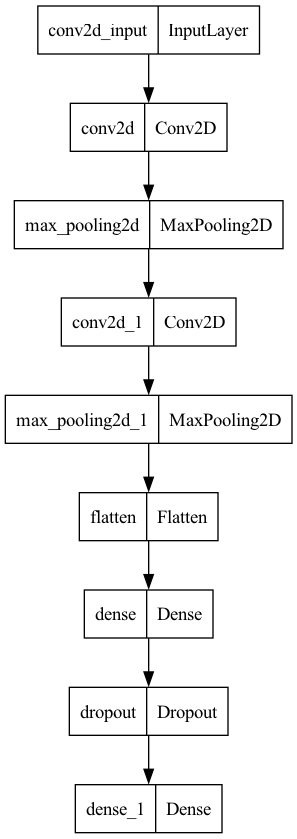

In [7]:
keras.utils.plot_model(model)

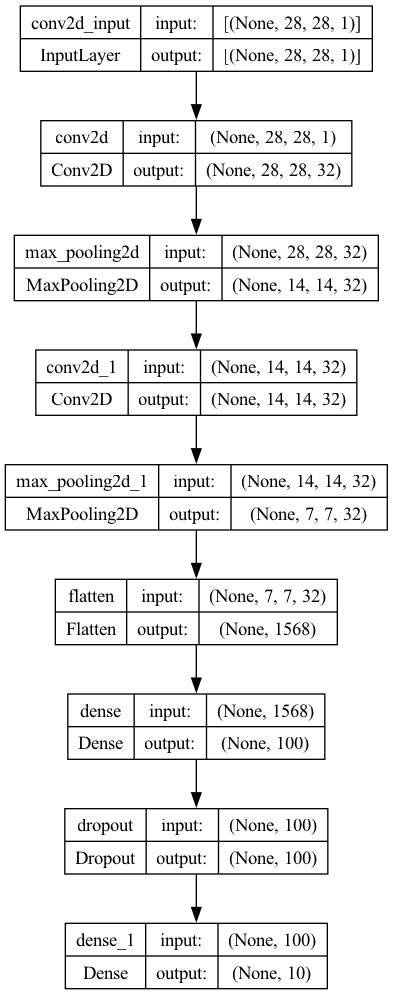

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
   1/1500 [..............................] - ETA: 7:38 - loss: 62.7905 - accuracy: 0.0312

2023-11-26 19:51:56.594008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 13s 9ms/step - loss: 4.3140 - accuracy: 0.7553 - val_loss: 2.2483 - val_accuracy: 0.7550
Epoch 2/20
  17/1500 [..............................] - ETA: 14s - loss: 1.6845 - accuracy: 0.8143

/Users/park/miniconda3/envs/aiNoteBook/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 13s 8ms/step - loss: 1.3043 - accuracy: 0.8208 - val_loss: 0.8784 - val_accuracy: 0.8295
Epoch 3/20
1500/1500 [==============================] - 13s 8ms/step - loss: 1.0219 - accuracy: 0.8354 - val_loss: 0.8655 - val_accuracy: 0.8044
Epoch 4/20
1500/1500 [==============================] - 13s 8ms/step - loss: 1.0793 - accuracy: 0.8382 - val_loss: 0.8916 - val_accuracy: 0.8390
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 1.5502 - accuracy: 0.8389 - val_loss: 1.4006 - val_accuracy: 0.8286


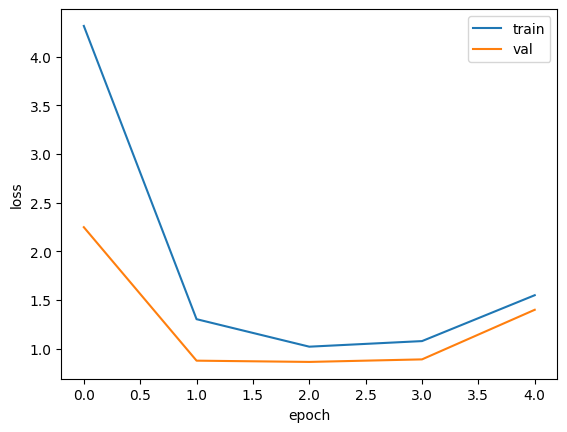

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.8655 - accuracy: 0.8044


[0.8655024170875549, 0.8044166564941406]

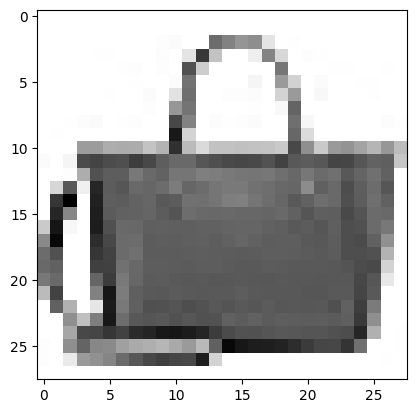

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)
# 9번째 값을 제외한 값들이 0에 가까움

1/1 [==============================] - 0s 59ms/step
[[1.3378623e-22 6.0462847e-34 4.7831812e-29 1.8542279e-25 1.0714372e-21
  2.6536236e-36 3.1193418e-24 9.2237557e-38 1.0000000e+00 6.8231764e-32]]


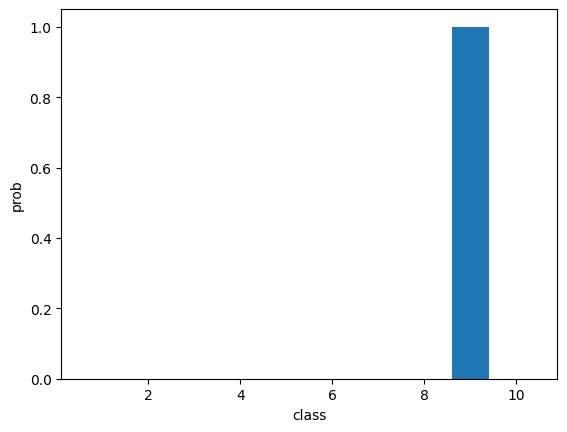

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])
# 가방으로 정확히 예측

가방


In [29]:
# test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1)
# print(test_scaled)
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.9395 - accuracy: 0.7886


[0.939471960067749, 0.7886000275611877]

Conv2D, MaxPooling2D, plot_model